# Load packages

In [872]:
# ! pip install imagecodecs
# ! pip install Pillow imagecodecs
# ! pip install jenkspy


In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd


%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import jenkspy
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  
import exposure_helper as helper

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define file locations and  constants

In [30]:
target_state = {
    "Pennsylvania": {
        "FIPS": "42",
        "Code": "PA"
    },
    "New York": {
        "FIPS": "36",
        "Code": "NY"
    },
    "New Jersey": {
        "FIPS": "34",
        "Code": "NJ"
    },
    "Rhode Island": {
        "FIPS": "44",
        "Code": "RI"
    },
    "Maine": {
        "FIPS": "23",
        "Code": "ME"
    },
    "Connecticut": {
        "FIPS": "09",
        "Code": "CT"
    },
    "Vermont": {
        "FIPS": "50",
        "Code": "VT"
    },
    "New Hampshire": {
        "FIPS": "33",
        "Code": "NH"
    },
    "Delaware": {
        "FIPS": "10",
        "Code": "DE"
    },
    "Massachusetts": {
        "FIPS": "25",
        "Code": "MA"
    },
    "West Virginia": {
        "FIPS": "54",
        "Code": "WV"
    },
    "Maryland": {
        "FIPS": "24",
        "Code": "MD"
    },
    "Virginia": {
        "FIPS": "51",
        "Code": "VA"
    },
    "Ohio": {
        "FIPS": "39",
        "Code": "OH"
    }
}
 
target_state_FIPS = [value['FIPS'] for key, value in target_state.items()]
target_state_FIPS

['42',
 '36',
 '34',
 '44',
 '23',
 '09',
 '50',
 '33',
 '10',
 '25',
 '54',
 '24',
 '51',
 '39']

In [31]:
air_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire'

In [32]:
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo

CRS = "ESRI:102003"

resolution = 2971.124461277293

data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Dell 
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Dell
ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Lenovo
# ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"

year = '2023'
month = 6

 
month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(save_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_natinol_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_natinol_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(save_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'


print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_natinol_fname:", adjusted_dwelling_time_stop_natinol_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)


Month directory: K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01
Save_dir directory: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test
ACS_file: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv
home_panel file name: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip
No dict colum file name: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_dict_column_2023_06.csv
Device home areas file name: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\NP_split_device_home_areas_2023_06.csv
Device person_per_device file name: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\person_per_device_2023_06.csv
Device adj

## Loading test: simulation resutls

In [33]:
wrf_file = os.path.join(air_dir, r"inference_2023-06-01 01-00-00p00-00.nc")
wrf=xr.open_dataset(wrf_file)
wrf

<xarray.Dataset>
Dimensions:                (y: 353, x: 333)
Coordinates:
  * y                      (y) float64 1.404e+06 1.401e+06 ... 3.581e+05
  * x                      (x) float64 1.269e+06 1.272e+06 ... 2.256e+06
    spatial_ref            int32 ...
Data variables:
    MASSDEN                (y, x) float64 ...
    PM2_5_DRY_SFC          (y, x) float64 ...
    prediction             (y, x) float64 ...
    stations               (y, x) float64 ...
    stations_interpolated  (y, x) float64 ...
    fused_data             (y, x) float64 ...

In [308]:
353*333

117549

## Find the grid resolution

In [9]:
resolution = helper.get_resolution(tick_list=(wrf.x)) # , helper.get_resolution(tick_list=(wrf.y))
print("resolution:", resolution)

resolution: 2971.1244612772925


## Load state boundary

<Axes: >

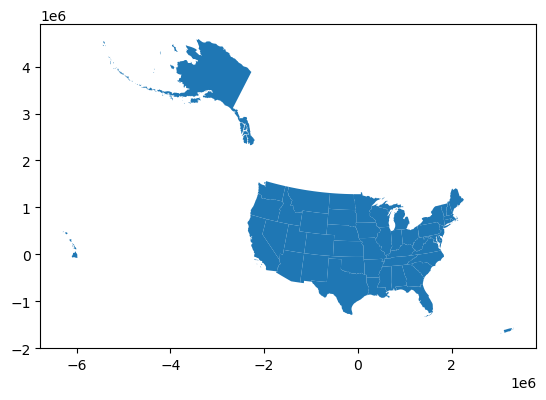

In [10]:
state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
state_gdf = state_gdf.to_crs("ESRI:102003")   # ESRI:102003 - NAD 1983 Albers contiguous USA
state_gdf.plot()

## Load CBG Boundary

In [11]:
CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 
CBG2019_gdf['state_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str[:2] 
CBG2019_gdf

,GEOID,geometry,county_FIPS,CBG,state_FIPS
0,010730059033,"POLYGON ((-86.69206 33.60022, -86.69174 33.600...",01073,010730059033,01
1,010730059031,"POLYGON ((-86.68307 33.59456, -86.68297 33.594...",01073,010730059031,01
2,010730059053,"POLYGON ((-86.70049 33.61777, -86.70047 33.617...",01073,010730059053,01
3,010730059051,"POLYGON ((-86.71185 33.59383, -86.71176 33.593...",01073,010730059051,01
4,010730057023,"POLYGON ((-86.88311 33.47224, -86.88307 33.472...",01073,010730057023,01
...,...,...,...,...,...
220328,720210302002,"POLYGON ((-66.14085 18.38643, -66.14022 18.389...",72021,720210302002,72
220329,720210314012,"POLYGON ((-66.16869 18.38156, -66.16750 18.382...",72021,720210314012,72
220330,720210312021,"POLYGON ((-66.18304 18.38045, -66.18263 18.380...",72021,720210312021,72
220331,720531504003,"POLYGON ((-65.64082 18.34100, -65.64019 18.341...",72053,720531504003,72


## Select target boundary

In [12]:
target_CBGs = CBG2019_gdf[CBG2019_gdf['state_FIPS'].isin(target_state_FIPS)]
target_CBGs

,GEOID,geometry,county_FIPS,CBG,state_FIPS
37041,090091756004,"POLYGON ((-72.85549 41.49063, -72.85270 41.494...",09009,090091756004,09
37042,090075420001,"POLYGON ((-72.63929 41.54655, -72.63924 41.547...",09007,090075420001,09
37043,090075420002,"POLYGON ((-72.65033 41.54911, -72.65026 41.549...",09007,090075420002,09
37044,090075420003,"POLYGON ((-72.65955 41.53161, -72.65943 41.531...",09007,090075420003,09
37045,090075421001,"POLYGON ((-72.66134 41.54110, -72.66123 41.541...",09007,090075421001,09
...,...,...,...,...,...
212835,540039719002,"POLYGON ((-78.04183 39.41767, -78.04161 39.418...",54003,540039719002,54
212836,540039718001,"POLYGON ((-78.19872 39.44580, -78.19860 39.446...",54003,540039718001,54
212837,540039715001,"POLYGON ((-77.96094 39.46440, -77.96086 39.464...",54003,540039715001,54
212838,540939654002,"POLYGON ((-79.69180 39.13416, -79.69139 39.135...",54093,540939654002,54


## Save target boundary

In [13]:
target_CBG_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\target_CBGs.shp"
# target_CBGs.to_crs("ESRI:102003").to_file(target_CBG_fname)

# Show fused data extent

<Axes: >

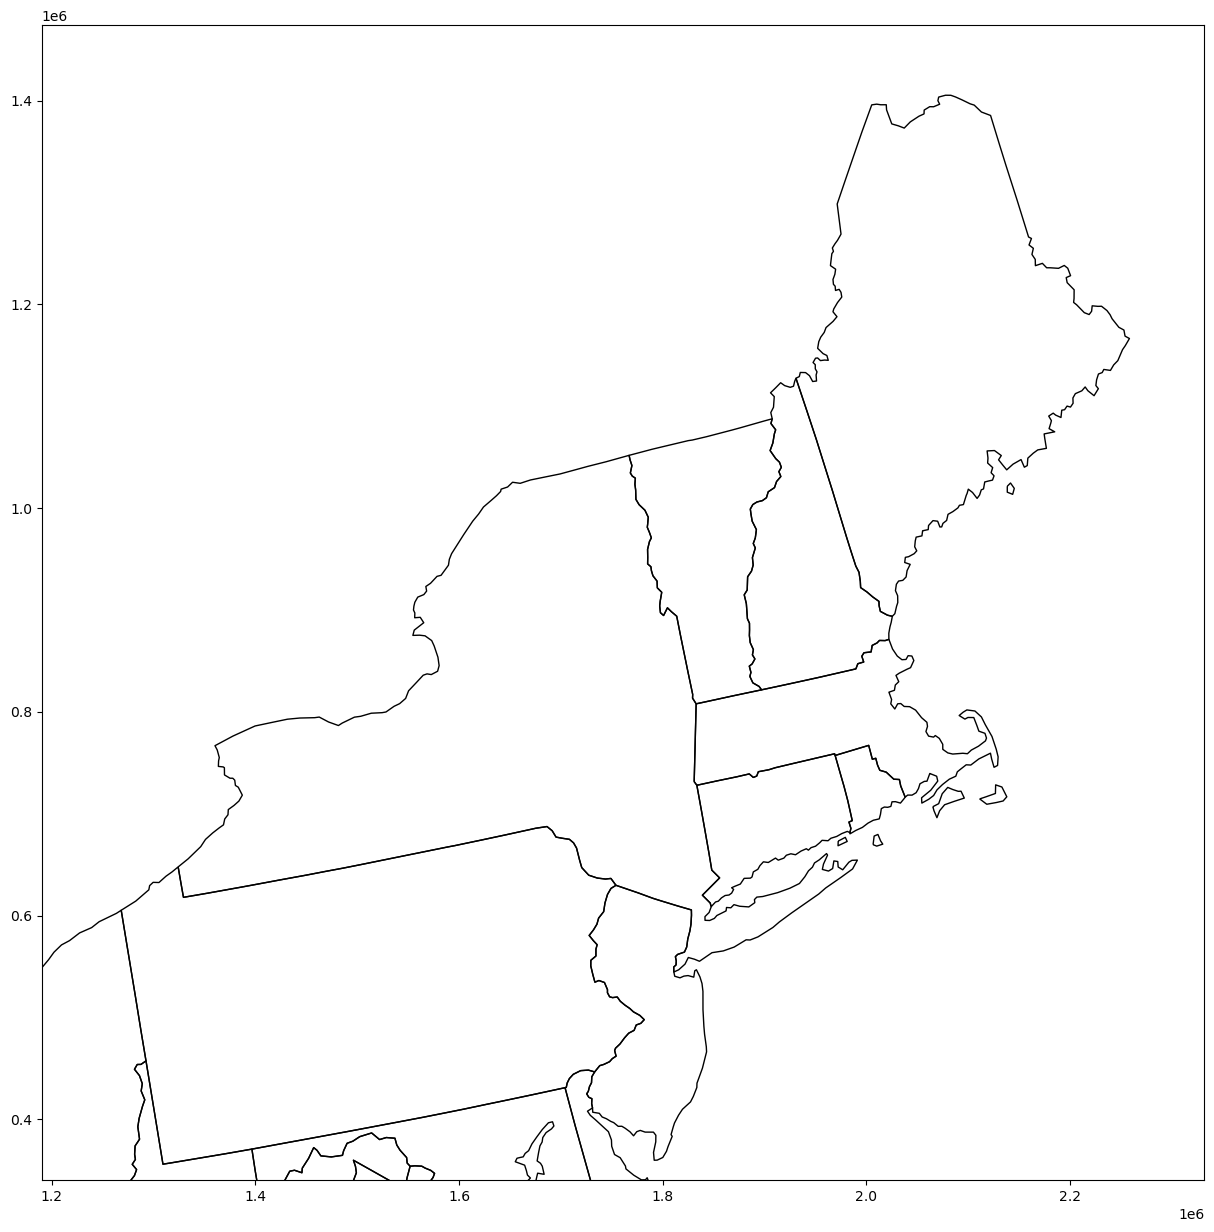

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))#

ax.axis('equal')

# wrf_var.isel(time=0).plot()  # , c=wrf_var.values, cmap='viridis'
# ax.scatter(wrf['x'].values, wrf['y'].values, s=0.05, c=wrf_var.values)

x_min_lim = wrf['x'].values.min() * 0.98
x_max_lim = wrf['x'].values.max() * 1.01

y_min_lim = wrf['y'].values.min() * 0.95
y_max_lim = wrf['y'].values.max() * 1.05

ax.set_xlim((x_min_lim, x_max_lim))
ax.set_ylim((y_min_lim, y_max_lim))

state_gdf.plot(ax=ax, facecolor="none")
# target_CBGs.to_crs("ESRI:102003").plot(ax=ax, facecolor="none")

## Show fused data

In [17]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})[['CBG_FIPS', 'totalpopulation']]
print("Total US population:", ACS_df['totalpopulation'].sum())

target_CBG_popu_gdf = target_CBGs.merge(ACS_df, left_on='CBG', right_on='CBG_FIPS')
target_CBG_popu_gdf

Total US population: 327227353


,GEOID,geometry,county_FIPS,CBG,state_FIPS,CBG_FIPS,totalpopulation
0,090091756004,"POLYGON ((-72.85549 41.49063, -72.85270 41.494...",09009,090091756004,09,090091756004,1454
1,090075420001,"POLYGON ((-72.63929 41.54655, -72.63924 41.547...",09007,090075420001,09,090075420001,1137
2,090075420002,"POLYGON ((-72.65033 41.54911, -72.65026 41.549...",09007,090075420002,09,090075420002,1334
3,090075420003,"POLYGON ((-72.65955 41.53161, -72.65943 41.531...",09007,090075420003,09,090075420003,1602
4,090075421001,"POLYGON ((-72.66134 41.54110, -72.66123 41.541...",09007,090075421001,09,090075421001,614
...,...,...,...,...,...,...,...
62737,540039719002,"POLYGON ((-78.04183 39.41767, -78.04161 39.418...",54003,540039719002,54,540039719002,3032
62738,540039718001,"POLYGON ((-78.19872 39.44580, -78.19860 39.446...",54003,540039718001,54,540039718001,2579
62739,540039715001,"POLYGON ((-77.96094 39.46440, -77.96086 39.464...",54003,540039715001,54,540039715001,932
62740,540939654002,"POLYGON ((-79.69180 39.13416, -79.69139 39.135...",54093,540939654002,54,540939654002,690


NameError: name 'extent' is not defined

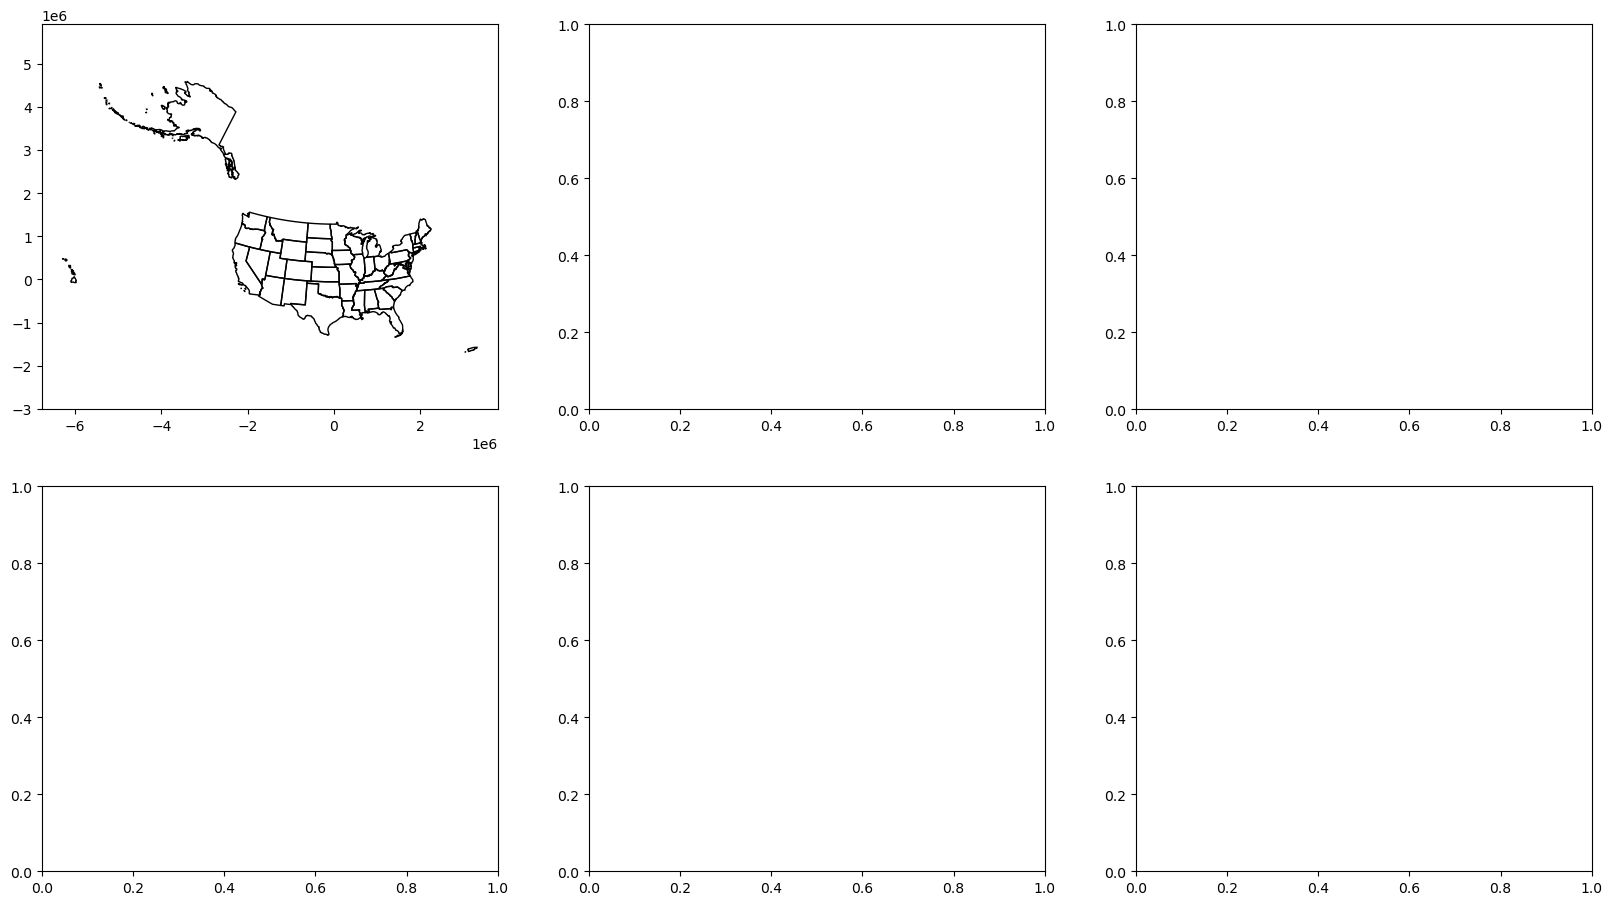

In [19]:
fused_file = os.path.join(air_dir, r"inference_2023-06-01 01-00-00p00-00.nc")
fused_data =xr.open_dataset(fused_file)

x_min_lim = fused_data['x'].values.min() * 1
x_max_lim = fused_data['x'].values.max() * 1

y_min_lim = fused_data['y'].values.min() * 1
y_max_lim = fused_data['y'].values.max() * 1

var_names = list(fused_data.data_vars)

# Show the grid
nrow = 2
ncol = 3

fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 11))   # , figsize=(333/15, 353/15)
 

extent = [grid_population_value_df['x'].min(), 
          grid_population_value_df['x'].max(),
          grid_population_value_df['y'].min(),
          grid_population_value_df['y'].max()]  # [left, right, bottom, top]

v_idx = 0
for row in range(nrow):
    for col in range(ncol):
        ax = axs[row, col]
        ax.axis('equal')
        
        # print('row, col, v_idx:', row, col, v_idx)
        var_name = var_names[v_idx]
        variable = fused_data[var_name]
        state_gdf.plot(ax=ax, facecolor="none")

        if var_name == 'stations':
            # var_name += ' (missing)'
            var_name = 'ACS popultion'
            # target_CBG_popu_gdf.to_crs(CRS).plot(ax=ax, column='totalpopulation',  legend=True, linewidth=0.4, edgecolor='face') # , 
            state_gdf.plot(ax=ax, column='ALAND', facecolor="none",  legend=True)

        else:
            cax = ax.imshow(variable.values, extent=extent )        
            fig.colorbar(cax, ax=ax, shrink=1)
            
        ax.set_title(var_name)
 
        ax.set_xlim((x_min_lim, x_max_lim))
        ax.set_ylim((y_min_lim, y_max_lim))
        
        v_idx += 1

In [ ]:

target_CBG_popu_gdf['totalpopulation'].sum()

In [679]:
# state_gdf['geometry'] = state_gdf.buffer(10000)  # Adjust the buffer distance as needed
# state_gdf.plot(edgecolor='none')
# # plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis('equal')
state_gdf.plot(ax=ax, facecolor="none")
plt.imshow(img, cmap='viridis', vmin=0, vmax= grid_population_value_df[column].max(),
           extent=extent,
           interpolation='none')

plt.colorbar()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis('equal')

# ax.set_xlim((x_min_lim, x_max_lim))
# ax.set_ylim((y_min_lim, y_max_lim))


extent = [grid_population_value_df['x'].min(), 
          grid_population_value_df['x'].max(),
          grid_population_value_df['y'].min(),
          grid_population_value_df['y'].max()]  # [left, right, bottom, top]


target_CBG_popu_gdf.plot(ax=ax, column='totalpopulation', linewidth=0.4, edgecolor='face', antialiased=False )  #  

# state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
# state_gdf = state_gdf.to_crs("ESRI:102003")   # ESRI:102003 - NAD 1983 Albers contiguous USA
# state_gdf.plot(ax=ax, linewidth=0.1, edgecolor='blue') #  cmap='viridis', legend=True, facecolor="none"



In [ ]:
target_CBG_popu_gdf

# Load hourly population

In [25]:
print("Load hourly population data from:", CBG_hourly_population_fname)
hourly_population_map_df = pd.read_csv(CBG_hourly_population_fname, dtype={'CBG':str}).set_index('CBG')

# Note: the fused data misses the first hour! 
# Need to remove this line in the furture.
hourly_population_map_df = hourly_population_map_df.iloc[:, 1:]    # 

hourly_population_map_df

Load hourly population data from: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\CBG_population_hourly_202306.csv


,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hour_457,h

# Load fused data

In [34]:
import glob

# Simulation resutls
year = 2023
month = 6  
air_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire'

fused_files = glob.glob(os.path.join(air_dir, f"inference_{year}-{month:02}-*.nc"))
# wrf=xr.open_dataset(wrf_file)
# wrf
print("Found file count:",len(fused_files))

Found file count: 719


## Load CBG to grid mapping file

In [1]:
CBG_to_grid_mapping_fname = "D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\CBG_to_grid.csv"
print("loading CBG to grid mapping file form:", CBG_to_grid_mapping_fname)

CBG_to_grid_df = pd.read_csv(CBG_to_grid_mapping_fname, dtype={'CBG':str, 'county_FIP':str, 'state_FIPS':str})
CBG_to_grid_df

loading CBG to grid mapping file form: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\CBG_to_grid.csv


NameError: name 'pd' is not defined

In [ ]:
hour_popu_df

In [37]:
state_external_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\external_erased.shp"
state_external_gdf = gpd.read_file(state_external_fname)
state_external_gdf


,Id,geometry
0,0,"MULTIPOLYGON (((1702763.940 414519.140, 170282..."


In [38]:
hourly_population_map_df

,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hour_457,h

In [51]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})[['CBG_FIPS', 'totalpopulation']]
print("Total US population:", ACS_df['totalpopulation'].sum())

Total US population: 327227353


'2023-06-30 23-00-00'

In [58]:

# ACS_df
resolution = helper.get_resolution(tick_list=(wrf.x)) # , helper.get_resolution(tick_list=(wrf.y))
print("resolution:", resolution)

save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\exposure'
visualization_dir = os.path.join(save_dir, 'visualization')
os.makedirs(save_dir, exist_ok=True)
os.makedirs(visualization_dir, exist_ok=True)

results_df_list = []

visualize = True

for idx, f in enumerate(fused_files[:]):
    print(f"Processing: {idx + 1} / {len(fused_files)}, {f}")
    date_time = os.path.basename(f)[10:29]
    year = os.path.basename(f)[10:14]
    month = os.path.basename(f)[15:17]
    day = os.path.basename(f)[18:20]
    hour = os.path.basename(f)[21:23]
    

    fused_data = xr.open_dataset(f)
    xy_value = helper.NC_to_xy_value(fused_data)
    xy_value_df = helper.xy_value_to_df(xy_value)
    
    hour_popu_df = hourly_population_map_df.iloc[:, idx]    # the .nc file missing a 2023-06-01 00:00 file. # need to correct the error!!
    hour_popu_df = pd.DataFrame(hour_popu_df.reset_index())
    hour_popu_df.columns = ['CBG', 'hour_population']
    hour_popu_df = hour_popu_df.merge(ACS_df, left_on='CBG', right_on='CBG_FIPS')

    hour_popu_df['hour_population'] = hour_popu_df['hour_population'].clip(lower=0)  # remove negative population # need to correct the error!!

    CBG_grid_population_df = CBG_to_grid_df.merge(hour_popu_df, left_on='CBG', right_on='CBG')
    CBG_grid_population_df['weighted_popu'] = CBG_grid_population_df['hour_population'] * CBG_grid_population_df['area_ratio']
    CBG_grid_population_df['ACS_weighted_popu'] = CBG_grid_population_df['totalpopulation'] * CBG_grid_population_df['area_ratio']
    grid_population_df = CBG_grid_population_df.groupby('xy_label', as_index=False)[['weighted_popu', 'ACS_weighted_popu']].sum()

    grid_population_value_df = grid_population_df.merge(xy_value_df, left_on='xy_label', right_on='xy_label')

    grid_population_value_df['fused_data_exposure'] = grid_population_value_df['weighted_popu'] * grid_population_value_df['fused_data']
    grid_population_value_df['ACS_fused_data_exposure'] = grid_population_value_df['ACS_weighted_popu'] * grid_population_value_df['fused_data']
    grid_population_value_df['stations_interpolated_exposure'] = grid_population_value_df['weighted_popu'] * grid_population_value_df['stations_interpolated']
    grid_population_value_df['ACS_stations_interpolated_exposure'] = grid_population_value_df['ACS_weighted_popu'] * grid_population_value_df['stations_interpolated']

    
    grid_population_value_df['year'] = year
    grid_population_value_df['month'] = month
    grid_population_value_df['day'] = day
    grid_population_value_df['hour'] = hour
    grid_population_value_df['date_time'] = date_time

    results_df_list.append(grid_population_value_df)

    # generate image
    resolution = helper.get_resolution(tick_list=(wrf.x)) # , helper.get_resolution(tick_list=(wrf.y))
 
    # print("resolution:", resolution)
    # column = 'value'
    column = 'fused_data_exposure'
    # column = 'weighted_popu'
    # column = 'ACS_weighted_popu'
    basename = os.path.basename(f).replace('inference', 'exposure')[:-3] + '.tif'
    img_fname = os.path.join(save_dir, basename)

    image_data = helper.dataframe_to_tiff(grid_population_value_df, column, resolution, img_fname)

    csv_fname = img_fname[:-4] + '.csv.zip'
    grid_population_value_df.to_csv(csv_fname, index=False, compression='zip')

    if visualize:
        basename = os.path.basename(f).replace('inference', 'visualization')[:-3] + '.png'
        save_fname = os.path.join(visualization_dir, basename)
        extent = [grid_population_value_df['x'].min(), 
                  grid_population_value_df['x'].max(),
                  grid_population_value_df['y'].min(),
                  grid_population_value_df['y'].max()] 
        # print("save_fname:", save_fname)
        helper.visualize_df_image(image_data, save_fname, extent, boundary_gdf=state_gdf, cover_gdf=state_external_gdf)


result_fname = os.path.join(save_dir, f'grid_population_exposure_{year}_{month}.csv')
# grid_population_value_all_df = pd.concat(results_df_list)

print("Saving results at:", result_fname)
# grid_population_value_all_df.to_csv(result_fname, index=False)
print("Done")
# grid_population_value_all_df

resolution: 2971.1244612772925
Processing: 1 / 719, D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\inference_2023-06-01 01-00-00p00-00.nc
Processing: 2 / 719, D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\inference_2023-06-01 02-00-00p00-00.nc
Processing: 3 / 719, D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\inference_2023-06-01 03-00-00p00-00.nc
Processing: 4 / 719, D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\inference_2023-06-01 04-00-00p00-00.nc
Processing: 5 / 719, D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\inference_2023-06-01 05-00-00p00-00.nc
Processing: 6 / 719, D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\inference_2023-06-01 06-00-00p00-00.nc
Processing: 7 / 719, D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wil

In [56]:
grid_population_value_all_df       
        

,xy_label,weighted_popu,ACS_weighted_popu,x,y,fused_data,MASSDEN,PM2_5_DRY_SFC,prediction,stations_interpolated,fused_data_exposure,ACS_fused_data_exposure,stations_interpolated_exposure,ACS_stations_interpolated_exposure,year,month,day,hour
0,1269_358,92.811240,100.918302,1.269255e+06,3.581268e+05,10.486976,0.0,3.612596,12.201368,8.276950,973.309221,1058.327778,768.193978,835.295719,2023,06,01,01
1,1269_361,92.811240,100.918302,1.269255e+06,3.610979e+05,11.964456,0.0,3.612596,12.201368,8.272281,1110.435967,1207.432544,767.760695,834.824588,2023,06,01,01
2,1269_364,79.231112,85.823861,1.269255e+06,3.640691e+05,11.981960,0.0,3.733774,10.695792,8.269268,949.344037,1028.338100,655.183312,709.700525,2023,06,01,01
3,1269_367,48.406282,50.936750,1.269255e+06,3.670402e+05,11.474331,0.0,3.733774,10.695792,8.268017,555.429692,584.465129,400.223947,421.145906,2023,06,01,01
4,1269_370,48.406282,50.936750,1.269255e+06,3.700113e+05,11.240396,0.0,3.733774,10.593472,8.268640,544.105797,572.549271,400.254102,421.177638,2023,06,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52586,2255_1160,13.443454,15.249024,2.255669e+06,1.160330e+06,27.434345,0.0,0.586093,3.070646,14.794029,368.812354,418.346984,198.882842,225.594496,2023,06,30,23
52587,2255_1163,35.348288,40.095863,2.255669e+06,1.163302e+06,27.426708,0.0,0.586093,3.070646,15.072925,969.487187,1099.697546,532.802096,604.361940,2023,06,30,23
52588,2255_1166,37.099474,42.082249,2.255669e+06,1.166273e+06,27.494032,0.0,0.709779,3.070646,15.354659,1020.014134,1157.010691,569.649786,646.158589,2023,06,30,23
52589,2255_1169,89.808680,80.928641,2.255669e+06,1.169244e+06,27.654919,0.0,0.693913,3.070646,15.638247,2483.651732,2238.074996,1404.450345,1265.582110,2023,06,30,23


In [49]:
groupped

fused_data_exposure  ACS_fused_data_exposure  \
year month day hour                                                 
2023 06    01  01           1.059275e+09             1.040296e+09   
               02           1.023225e+09             1.011253e+09   
               03           1.048703e+09             1.039858e+09   
               04           1.086818e+09             1.073420e+09   
               05           1.100903e+09             1.075246e+09   
...                                  ...                      ...   
           30  19           3.346411e+09             3.256406e+09   
               20           3.286142e+09             3.216480e+09   
               21           3.121620e+09             3.068359e+09   
               22           2.948363e+09             2.903890e+09   
               23           2.810573e+09             2.789000e+09   

                     stations_interpolated_exposure  \
year month day hour                                   
2023 06    01  01                      1.055940e+09   
               02                      1.040435e+09   
               03                      1.075344e+09   
               04                      1.107848e+09   
               05                      1.133222e+09   
...                                             ...   
           30  19                      3.482769e+09   
               20                      3.511168e+09   
               21                      3.359135e+09   
               22                      3.084607e+09   
               23                      2.839593e+09   

                     ACS_stations_interpolated_exposure  
year month day hour                                      
2023 06    01  01                          1.038615e+09  
               02                          1.028459e+09  
               03                          1.064975e+09  
               04                          1.093470e+09  
               05                          1.104616e+09  
...                                                 ...  
           30  19                          3.385165e+09  
               20                          3.441093e+09  
               21                          3.305284e+09  
               22                          3.039843e+09  
               23                          2.822701e+09  

[719 rows x 4 columns]

In [48]:
groupped = grid_population_value_all_df.groupby(['year', 'month', 'day', 'hour'])[['fused_data_exposure', 
                              'ACS_fused_data_exposure', 
                              'stations_interpolated_exposure', 
                              'ACS_stations_interpolated_exposure']].sum()

# groupped.plot()

<Axes: xlabel='year,month,day,hour'>

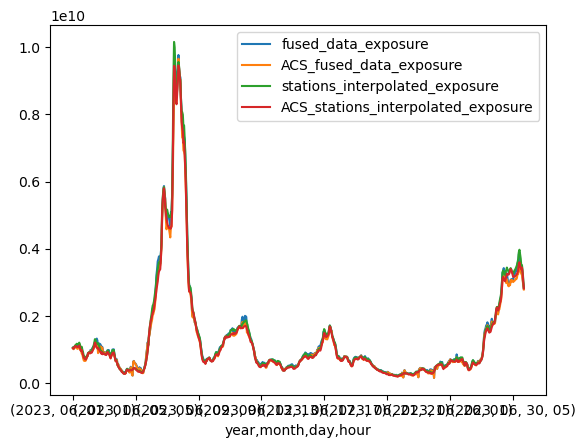

In [50]:
groupped.plot()

## Visualization

In [1032]:
import numpy as np
import pandas as pd
from PIL import Image
import tifffile as tiff
import matplotlib.colors as mcolors
from matplotlib.patches import PathPatch
from matplotlib.path import Path

state_external_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\external_erased.shp"
state_external_gdf = gpd.read_file(state_external_fname)

resolution = helper.get_resolution(tick_list=(wrf.x)) # , helper.get_resolution(tick_list=(wrf.y))
print("resolution:", resolution)
 
# Call the function
# column = 'value'
column = 'fused_data_exposure'
# column = 'weighted_popu'
# column = 'ACS_weighted_popu'

# column = 'y'
# grid_population_value_df['t'] = grid_population_value_df['y']
# column = 't'

img = helper.dataframe_to_tiff(grid_population_value_df, column, resolution, 'output_image')

extent = [grid_population_value_df['x'].min(), 
          grid_population_value_df['x'].max(),
          grid_population_value_df['y'].min(),
          grid_population_value_df['y'].max()]  # [left, right, bottom, top]


fig, ax = plt.subplots(figsize=(17.5, 15))
ax.axis('equal')
state_gdf.plot(ax=ax, facecolor="none", zorder=2)

# Create a mask for the area outside the shapefile
path = Path(state_gdf.geometry.iloc[2].exterior.coords)
patch = PathPatch(path, transform=ax.transData, facecolor='white', lw=0, zorder=1)
ax.add_patch(patch)

cmap = plt.cm.viridis
# Modify the colormap to set the zero value to white
colors = cmap(np.arange(cmap.N))
# colors[0, :3] = 1.0  # Set the first row to white (for zero values)
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, cmap.N)

state_external_gdf.plot(ax=ax, facecolor="white", zorder=1)

 
# Classify data
breaks = [grid_population_value_df.sort_values(column)[column].quantile(q * 0.1) for q in range(1, 10, 1) ]
 
plt.imshow(
           # np.digitize(img, breaks), 
           img,  # need to receive a numpy array, not a Pillow image.
           cmap='viridis',  # , vmin=0, vmax= grid_population_value_df[column].max()
           # cmap=custom_cmap,
           extent=extent,
           interpolation='nearest')   # .iloc[::-1, :]

# plt.imshow(fused_data['fused_data'], cmap='viridis', vmin=0, vmax= grid_population_value_df[column].max(),
#            extent=extent,
#            interpolation='nearest',
#            )
 
plt.colorbar()

resolution: 2971.1244612772925


ValueError: unknown file extension: 

In [948]:
target_CBG_popu_gdf['totalpopulation'].sum()
CBG_grid_population_df.drop_duplicates(subset=['CBG'])['totalpopulation'].sum()

60137032

In [949]:
hour_popu_df.min()
# xy_value_df.min()
grid_population_value_df[['weighted_popu', 'ACS_weighted_popu' ]].sum()
# grid_population_value_df

weighted_popu        6.201668e+07
ACS_weighted_popu    5.996680e+07
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


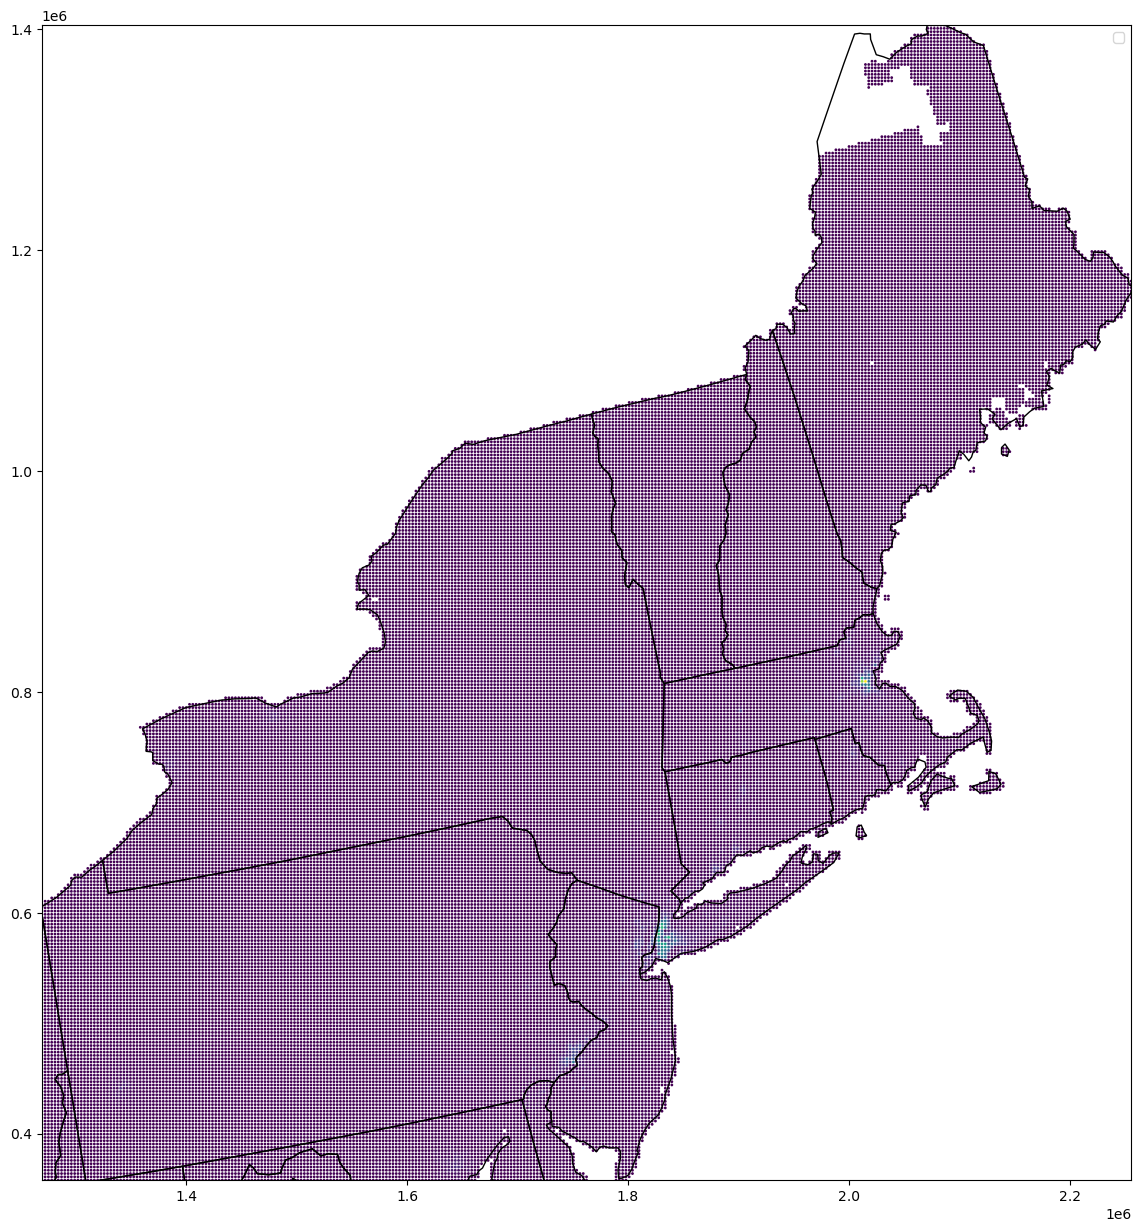

In [811]:
# Show the grid

fused_file = os.path.join(air_dir, r"inference_2023-06-01 01-00-00p00-00.nc")
fused_data =xr.open_dataset(fused_file)

values = fused_data['fused_data']

fig, ax = plt.subplots(figsize=(20, 15))
ax.scatter(grid_population_value_df['x'], grid_population_value_df['y'], c=grid_population_value_df['exposure'], s=1)
# ax.scatter(x=grid_population_value_df['x'], y=grid_population_value_df['y'], c=grid_population_value_df['value'], s=1)
# ax.scatter(grid_population_value_df['x'], grid_population_value_df['y'], c=grid_population_value_df['weighted_popu'], s=2)
# ax.scatter(grid_population_value_df['x'], grid_population_value_df['y'], c=grid_population_value_df['ACS_weighted_popu'], s=2)



# state_gdf.plot(ax=ax)

# ax.axis('equal')

# wrf_var.isel(time=0).plot()  # , c=wrf_var.values, cmap='viridis'
# ax.scatter(wrf['x'].values, wrf['y'].values, s=0.05, c=wrf_var.values)

x_min_lim = wrf['x'].values.min() * 1
x_max_lim = wrf['x'].values.max() * 1

y_min_lim = wrf['y'].values.min() * 1
y_max_lim = wrf['y'].values.max() * 1

ax.set_xlim((x_min_lim, x_max_lim))
ax.set_ylim((y_min_lim, y_max_lim))

state_gdf.plot(ax=ax, facecolor="none")
plt.legend()

Given a Pandas DataFrame, containing x, y, and value columns, write a python function to convert it into an image and save it as a compressed TIFF with worldfile.

In [725]:
grid_population_value_df

,xy_label,weighted_popu,ACS_weighted_popu,x,y,value,exposure,ACS_exposure
0,1269_358,86.938584,100.918302,1.269255e+06,3.581268e+05,15.122688,1314.745104,1526.156024
1,1269_361,86.938584,100.918302,1.269255e+06,3.610979e+05,15.206043,1321.991866,1534.568064
2,1269_364,75.345553,85.823861,1.269255e+06,3.640691e+05,15.243593,1148.536963,1308.264031
3,1269_367,46.573241,50.936750,1.269255e+06,3.670402e+05,15.303825,712.748743,779.527133
4,1269_370,46.573241,50.936750,1.269255e+06,3.700113e+05,15.363074,715.508157,782.545081
...,...,...,...,...,...,...,...,...
52586,2255_1160,14.989430,15.249024,2.255669e+06,1.160330e+06,12.605558,188.950131,192.222460
52587,2255_1163,39.413285,40.095863,2.255669e+06,1.163302e+06,12.684315,499.930515,508.588551
52588,2255_1166,41.365855,42.082249,2.255669e+06,1.166273e+06,12.607465,521.518562,530.550470
52589,2255_1169,69.694149,80.928641,2.255669e+06,1.169244e+06,12.556728,875.130499,1016.198967


resolution: 2971.1244612772925
277334.8578153


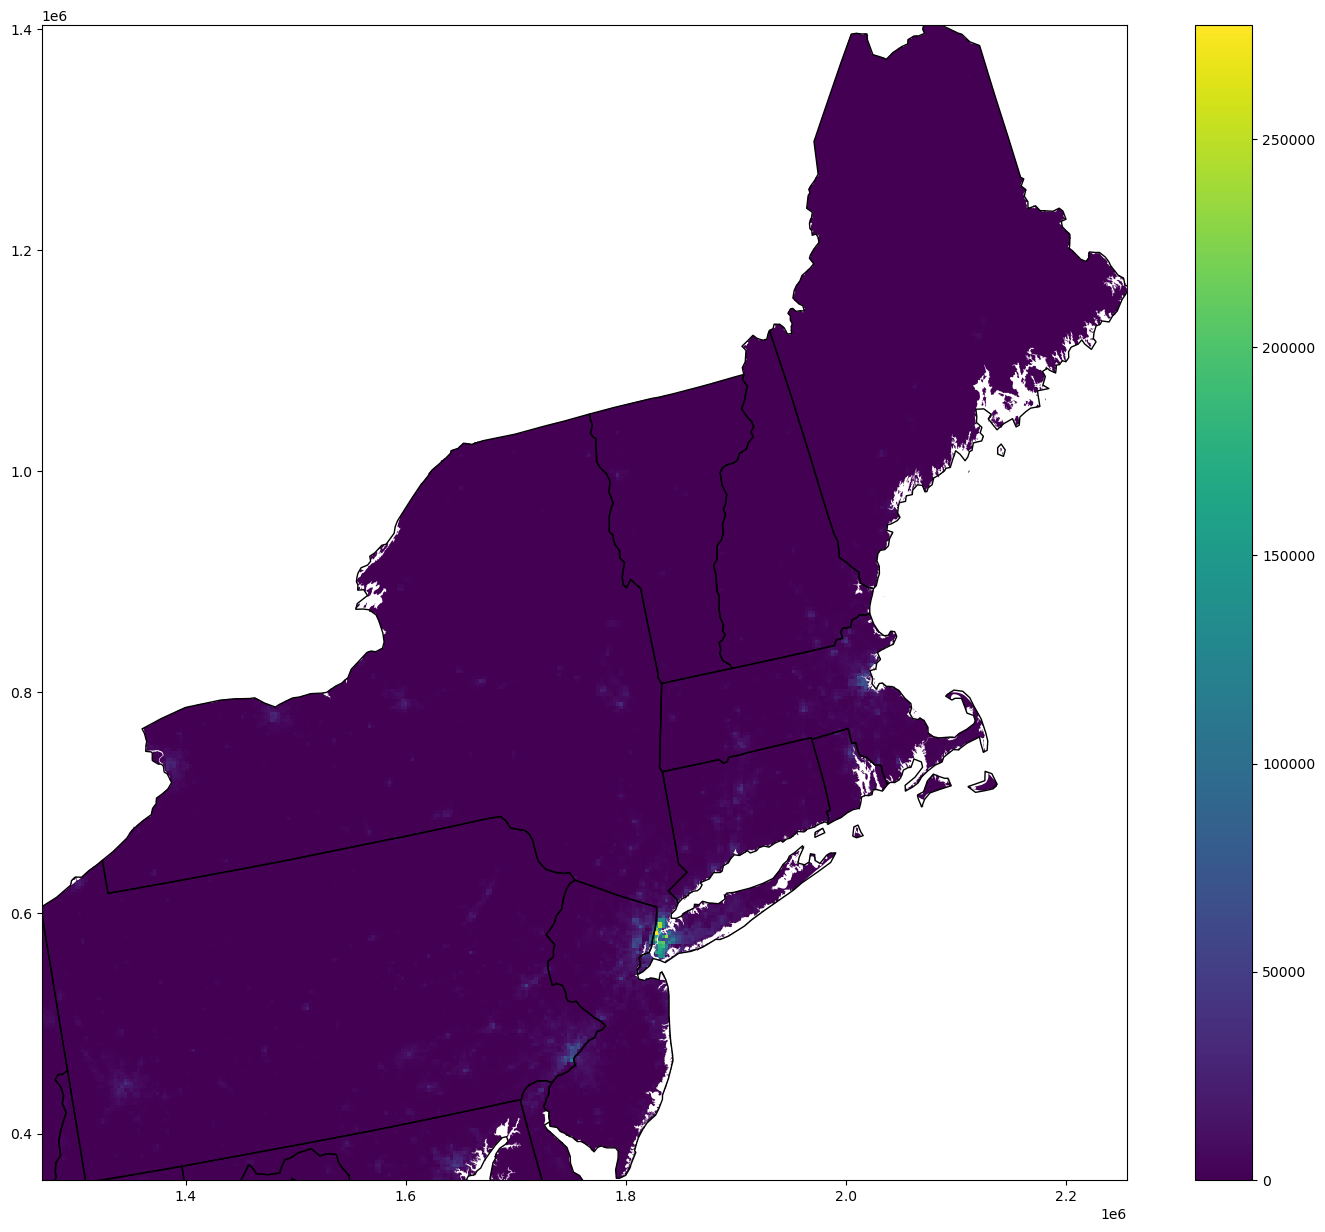

In [996]:
import numpy as np
import pandas as pd
from PIL import Image
import tifffile as tiff
import matplotlib.colors as mcolors
from matplotlib.patches import PathPatch
from matplotlib.path import Path

state_external_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\external_erased.shp"
state_external_gdf = gpd.read_file(state_external_fname)

resolution = helper.get_resolution(tick_list=(wrf.x)) # , helper.get_resolution(tick_list=(wrf.y))
print("resolution:", resolution)
 
# Call the function
# column = 'value'
# column = 'exposure'
# column = 'weighted_popu'
column = 'ACS_weighted_popu'

# column = 'y'
# grid_population_value_df['t'] = grid_population_value_df['y']
# column = 't'

img = helper.dataframe_to_tiff(grid_population_value_df, column, resolution, 'output_image')

extent = [grid_population_value_df['x'].min(), 
          grid_population_value_df['x'].max(),
          grid_population_value_df['y'].min(),
          grid_population_value_df['y'].max()]  # [left, right, bottom, top]


fig, ax = plt.subplots(figsize=(17.5, 15))
ax.axis('equal')
state_gdf.plot(ax=ax, facecolor="none", zorder=2)

# Create a mask for the area outside the shapefile
path = Path(state_gdf.geometry.iloc[2].exterior.coords)
patch = PathPatch(path, transform=ax.transData, facecolor='white', lw=0, zorder=1)
ax.add_patch(patch)

cmap = plt.cm.viridis
# Modify the colormap to set the zero value to white
colors = cmap(np.arange(cmap.N))
# colors[0, :3] = 1.0  # Set the first row to white (for zero values)
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, cmap.N)

state_external_gdf.plot(ax=ax, facecolor="white", zorder=1)

 
# Classify data
breaks = [grid_population_value_df.sort_values(column)[column].quantile(q * 0.1) for q in range(1, 10, 1) ]
 
plt.imshow(
           # np.digitize(img, breaks), 
           img,  # need to receive a numpy array, not a Pillow image.
           cmap='viridis',  # , vmin=0, vmax= grid_population_value_df[column].max()
           # cmap=custom_cmap,
           extent=extent,
           interpolation='nearest')   # .iloc[::-1, :]

# plt.imshow(fused_data['fused_data'], cmap='viridis', vmin=0, vmax= grid_population_value_df[column].max(),
#            extent=extent,
#            interpolation='nearest',
#            )
 
plt.colorbar()

In [1058]:
idx

697

In [926]:
np.digitize(img, breaks)
breaks

[12.307674347835956,
 13.053365458235508,
 13.54950441142698,
 13.945537623567859,
 14.233678329200094,
 14.614623069763184,
 15.130409658901062,
 15.88906519746064,
 18.291240509303243]

In [922]:
img.shape
img

array([[   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [ 902.7874 , 1055.9102 , 1219.9158 , ...,    0.     ,    0.     ,
           0.     ],
       [1040.1729 , 1050.352  ,  859.7134 , ...,    0.     ,    0.     ,
           0.     ],
       [ 911.72284,  974.39276,  542.5383 , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

(array([5259., 5260., 5259., 5259., 5258., 5260., 5259., 5258.]),
 array([12.30767435, 13.05336546, 13.54950441, 13.94553762, 14.23367833,
        14.61462307, 15.13040966, 15.8890652 , 18.29124051]),
 <BarContainer object of 8 artists>)

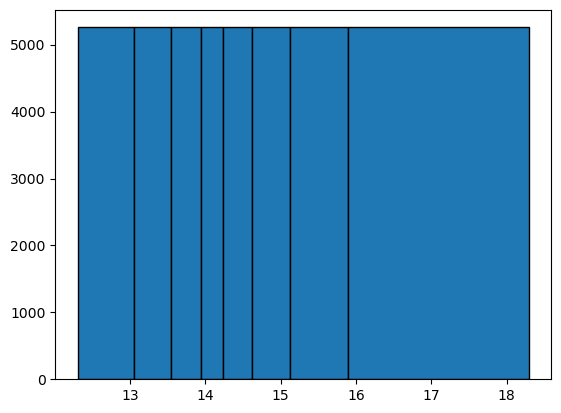

In [928]:
num_classes = 10
# breaks = jenkspy.jenks_breaks(img.flatten(), n_classes=num_classes)

plt.hist(img.flatten(), bins=breaks, edgecolor='black')

In [909]:
breaks = [grid_population_value_df.sort_values('value')['value'].quantile(q * 0.1) for q in range(1, 10, 1) ]
breaks
np.digitize(img, breaks).std()

4.444497679194553

In [915]:
list(range(1, 10, 1))
np.digitize(img, breaks).flatten().max()
list(range(1, 10, 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [883]:
breaks = jenkspy.jenks_breaks(grid_population_value_df['value'].to_list(), n_classes=num_classes)
breaks

KeyboardInterrupt: 

In [450]:
img.max().max(), grid_population_value_df['exposure'].max(), img.min().min(), grid_population_value_df['exposure'].min()
img.max().max(), grid_population_value_df['ACS_weighted_popu'].max(), img.min().min(), grid_population_value_df['ACS_weighted_popu'].min()

(277334.84, 277334.8578153, 0.0, 0.0)

In [867]:
img.shape

(353, 333)

In [460]:
img.max().max(), grid_population_value_df['exposure'].max(), img.min().min(), grid_population_value_df['exposure'].min()

(277334.84, 5113546.022715565, 0.0, -26288.32483029907)

In [398]:
grid_population_value_df 

,xy_label,weighted_popu,x,y,value,exposure
0,1269_358,86.938584,1.269255e+06,3.581268e+05,17.437664,1516.005817
1,1269_361,86.938584,1.269255e+06,3.610979e+05,17.456306,1517.626563
2,1269_364,75.345553,1.269255e+06,3.640691e+05,17.472376,1316.465825
3,1269_367,46.573241,1.269255e+06,3.670402e+05,17.486284,814.392925
4,1269_370,46.573241,1.269255e+06,3.700113e+05,17.492489,814.681894
...,...,...,...,...,...,...
52586,2255_1160,14.989430,2.255669e+06,1.160330e+06,12.358133,185.241370
52587,2255_1163,39.413285,2.255669e+06,1.163302e+06,12.401971,488.802415
52588,2255_1166,41.365855,2.255669e+06,1.166273e+06,12.484426,516.428938
52589,2255_1169,69.694149,2.255669e+06,1.169244e+06,12.482272,869.941337


# Tool

In [91]:
# Simulation resutls
import glob

air_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire'

wrf_file = os.path.join(air_dir, r"inference_2023-06-01 01-00-00p00-00.nc")
wrf=xr.open_dataset(wrf_file)
wrf

<xarray.Dataset>
Dimensions:                (y: 353, x: 333)
Coordinates:
  * y                      (y) float64 1.404e+06 1.401e+06 ... 3.581e+05
  * x                      (x) float64 1.269e+06 1.272e+06 ... 2.256e+06
    spatial_ref            int32 ...
Data variables:
    MASSDEN                (y, x) float64 ...
    PM2_5_DRY_SFC          (y, x) float64 ...
    prediction             (y, x) float64 ...
    stations               (y, x) float64 ...
    stations_interpolated  (y, x) float64 ...
    fused_data             (y, x) float64 ...

In [53]:
# make a mesh

import numpy as np

# Define the range for x and y
x_values = wrf['x']
y_values = wrf['y']

# Create a mesh grid
X, Y = np.meshgrid(x_values, y_values)

# X, Y are now matrices holding the x and y coordinates of each point in the grid
# If you need to extract the coordinates as a list of (x, y) tuples
xy_coordinates = np.array([X, Y]).T.reshape(-1, 2)

# Printing the first few coordinates for demonstration
print("First few x-y coordinates from the grid:")
print(xy_coordinates[:5])

xy_coordinates.shape, wrf['fused_data'].values.shape

First few x-y coordinates from the grid:
[[1269255.197404   1403962.63379005]
 [1269255.197404   1400991.50932877]
 [1269255.197404   1398020.38486749]
 [1269255.197404   1395049.26040621]
 [1269255.197404   1392078.13594494]]


((117549, 2), (353, 333))

In [136]:
xy_coordinates.shape

(117549, 2)

In [150]:

wrf_file = os.path.join(air_dir, r"inference_2023-06-01 01-00-00p00-00.nc")
x_arr=xr.open_dataset(wrf_file)
x_arr
xy_value = NC_to_xy_value(x_arr)
xy_value_to_df = xy_value_to_df(xy_value)
xy_value_to_df

,x,y,value,xy_label
0,1.269255e+06,1.403963e+06,12.113662,1269_1403
1,1.269255e+06,1.400992e+06,14.797650,1269_1400
2,1.269255e+06,1.398020e+06,14.969597,1269_1398
3,1.269255e+06,1.395049e+06,15.132867,1269_1395
4,1.269255e+06,1.392078e+06,15.256241,1269_1392
...,...,...,...,...
117544,2.255669e+06,3.700113e+05,15.260253,2255_370
117545,2.255669e+06,3.670402e+05,15.420875,2255_367
117546,2.255669e+06,3.640691e+05,15.644938,2255_364
117547,2.255669e+06,3.610979e+05,15.204535,2255_361


Input a list of x-y centroids named xy_coordinates, then use geopandas to generate of square polygons with the side of 3 km.


In [73]:
import geopandas as gpd
from shapely.geometry import Polygon, Point
import numpy as np

# Example list of coordinates (assuming these are in a metric coordinate system)


# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [Point(x, y) for x, y in xy_coordinates]})

# Function to create a square polygon around a point
def create_square(point, side_length):
    # Side length divided by 2
    d = side_length / 2

    # Coordinates of the square's corners
    x, y = point.x, point.y
    square_coords = [(x - d, y - d), (x - d, y + d), (x + d, y + d), (x + d, y - d)]

    # Create and return the polygon
    return Polygon(square_coords)



# Convert side length to the same units as the coordinate system
# Assuming the coordinate system is in meters
side_length = 2971.124461277293  # meter

# Apply the function to create squares
gdf['square'] = gdf['geometry'].apply(lambda point: create_square(point, side_length))

# Resulting GeoDataFrame with squares
squares_gdf = gdf.set_geometry('square').set_crs("ESRI:102003")

grid_fname = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\polygons\grid.shp'

squares_gdf.reset_index().drop(columns=['geometry']).to_file(grid_fname)
# Now squares_gdf contains the squares around each point
squares_gdf

In [59]:
squares_gdf#plot()

,geometry,square
0,POINT (1269255.197 1403962.634),"POLYGON ((1267755.197 1402462.634, 1267755.197..."
1,POINT (1269255.197 1400991.509),"POLYGON ((1267755.197 1399491.509, 1267755.197..."
2,POINT (1269255.197 1398020.385),"POLYGON ((1267755.197 1396520.385, 1267755.197..."
3,POINT (1269255.197 1395049.260),"POLYGON ((1267755.197 1393549.260, 1267755.197..."
4,POINT (1269255.197 1392078.136),"POLYGON ((1267755.197 1390578.136, 1267755.197..."
...,...,...
117544,POINT (2255668.519 370011.321),"POLYGON ((2254168.519 368511.321, 2254168.519 ..."
117545,POINT (2255668.519 367040.197),"POLYGON ((2254168.519 365540.197, 2254168.519 ..."
117546,POINT (2255668.519 364069.072),"POLYGON ((2254168.519 362569.072, 2254168.519 ..."
117547,POINT (2255668.519 361097.948),"POLYGON ((2254168.519 359597.948, 2254168.519 ..."


## Generate labels for grids

In [109]:
raw_grid_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Wild_fire\polygons\grid.shp"
raw_grid_gdf = gpd.read_file(raw_grid_fname)
raw_grid_gdf

,index,xy_label,geometry
0,0,1269_1403,"POLYGON ((1267769.635 1402477.072, 1267769.635..."
1,1,1269_1400,"POLYGON ((1267769.635 1399505.947, 1267769.635..."
2,2,1269_1398,"POLYGON ((1267769.635 1396534.823, 1267769.635..."
3,3,1269_1395,"POLYGON ((1267769.635 1393563.698, 1267769.635..."
4,4,1269_1392,"POLYGON ((1267769.635 1390592.574, 1267769.635..."
...,...,...,...
117544,117544,2255_370,"POLYGON ((2254182.956 368525.759, 2254182.956 ..."
117545,117545,2255_367,"POLYGON ((2254182.956 365554.635, 2254182.956 ..."
117546,117546,2255_364,"POLYGON ((2254182.956 362583.510, 2254182.956 ..."
117547,117547,2255_361,"POLYGON ((2254182.956 359612.386, 2254182.956 ..."


In [108]:
xy_label = (0.001 * raw_grid_gdf.centroid.x).astype(int).astype(str) + "_" + \
(0.001 * raw_grid_gdf.centroid.y).astype(int).astype(str)

raw_grid_gdf['xy_label'] = xy_label.to_list()
# raw_grid_gdf.to_file(raw_grid_fname)
raw_grid_gdf

,index,geometry,xy_label
0,0,"POLYGON ((1267769.635 1402477.072, 1267769.635...",1269_1403
1,1,"POLYGON ((1267769.635 1399505.947, 1267769.635...",1269_1400
2,2,"POLYGON ((1267769.635 1396534.823, 1267769.635...",1269_1398
3,3,"POLYGON ((1267769.635 1393563.698, 1267769.635...",1269_1395
4,4,"POLYGON ((1267769.635 1390592.574, 1267769.635...",1269_1392
...,...,...,...
117544,117544,"POLYGON ((2254182.956 368525.759, 2254182.956 ...",2255_370
117545,117545,"POLYGON ((2254182.956 365554.635, 2254182.956 ...",2255_367
117546,117546,"POLYGON ((2254182.956 362583.510, 2254182.956 ...",2255_364
117547,117547,"POLYGON ((2254182.956 359612.386, 2254182.956 ...",2255_361


,county_FIP,CBG,state_FIPS,area,area_ratio,index,sub_area,xy_label
0,09009,090091756004,09,1.624620,0.739736,75080,1.201790,1899_679
1,09009,090091756005,09,2.416330,0.912785,75080,2.205590,1899_679
2,09009,090093431022,09,10.858700,0.046871,75080,0.508957,1899_679
3,09009,090091755003,09,6.369900,0.041384,75080,0.263615,1899_679
4,09009,090091757002,09,4.508140,0.131972,75080,0.594949,1899_679
...,...,...,...,...,...,...,...,...
184130,54051,540510208002,54,111.460999,0.079199,4230,8.827580,1301_372
184131,54003,540039719002,54,11.435800,0.026285,30356,0.300589,1521_361
184132,54003,540039718001,54,114.150002,0.074700,30356,8.526990,1521_361
184133,54003,540039718001,54,114.150002,0.077333,29296,8.827580,1512_364


In [120]:
CBG_to_grid_df.merge(raw_grid_gdf, left_on='index', right_on='index').drop(columns=['OID_','FID_target', 'FID_US_gri', 'geometry']).to_csv(r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\CBG_to_grid.csv", index=False)

In [118]:
raw_grid_gdf
raw_grid_gdf
CBG_to_grid_df

,OID_,FID_target,county_FIP,CBG,state_FIPS,area,FID_US_gri,area_ratio,index,sub_area
0,0,0,09009,090091756004,09,1.624620,37168,0.739736,75080,1.201790
1,1,0,09009,090091756004,09,1.624620,37330,0.260258,75433,0.422821
2,2,1,09007,090075420001,09,1.355820,38011,0.224333,76841,0.304155
3,3,1,09007,090075420001,09,1.355820,38012,0.019008,76842,0.025772
4,4,1,09007,090075420001,09,1.355820,38184,0.209352,77194,0.283844
...,...,...,...,...,...,...,...,...,...,...
184130,184130,63096,54003,540039718001,54,114.150002,10975,0.032746,30357,3.737970
184131,184131,63096,54003,540039718001,54,114.150002,11123,0.005739,30708,0.655124
184132,184132,63096,54003,540039718001,54,114.150002,11124,0.000424,30709,0.048381
184133,184133,63097,54003,540039715001,54,0.749657,11273,0.420651,31060,0.315344


In [760]:
arr = helper.NC_to_xy_value(fused_data)

arr

array([[1.26925520e+06, 1.40396263e+06, 1.21136618e+01],
       [1.27222632e+06, 1.40396263e+06, 1.47976503e+01],
       [1.27519745e+06, 1.40396263e+06, 1.49695969e+01],
       ...,
       [2.24972627e+06, 3.58126823e+05, 1.56449385e+01],
       [2.25269739e+06, 3.58126823e+05, 1.52045355e+01],
       [2.25566852e+06, 3.58126823e+05, 1.19698677e+01]])

In [778]:
x_values = list(range(20, 22, 1))
y_values = list(range(30, 33, 1))[::-1]

print("x_values:", x_values)
print("y_values:", y_values)

arr = np.array([[1, 2], [3, 4], [7, 8]])
print("arr: \n", arr)

X, Y = np.meshgrid(x_values, y_values)
print("X: \n", X)
print("Y: \n", Y)

xy_coordinates = np.array([X, Y]).T.reshape(-1, 2)
print("xy_coordinates: \n", xy_coordinates)

values = np.array(arr.T.reshape(-1, 1))

print("values:\n", values)

x_values: [20, 21]
y_values: [32, 31, 30]
arr: 
 [[1 2]
 [3 4]
 [7 8]]
X: 
 [[20 21]
 [20 21]
 [20 21]]
Y: 
 [[32 32]
 [31 31]
 [30 30]]
xy_coordinates: 
 [[20 32]
 [20 31]
 [20 30]
 [21 32]
 [21 31]
 [21 30]]
values:
 [[1]
 [3]
 [7]
 [2]
 [4]
 [8]]


In [773]:
 np.array([X, Y])#.T

array([[[20, 21],
        [20, 21],
        [20, 21]],

       [[30, 30],
        [31, 31],
        [32, 32]]])

In [754]:
x_values = list(range(2))
y_values = list(range(2))

x_values = list(range(20, 22, 1))
y_values = list(range(30, 33, 1))



X, Y = np.meshgrid(x_values, y_values)
xy_coordinates = np.array([X, Y]).T.reshape(-1, 2)

lst = []

for row, y in enumerate(y_values):
    for col, x in enumerate(x_values):    
        lst.append([x, y, arr[row, col]])

lst        
# lst = [(i, j, arr[i, j]) for i in range(arr.shape[0]) for j in range(arr.shape[1])]
# lst
# values = np.array(x_arr['fused_data']).reshape(-1, 1)

# data_arr = np.concatenate((xy_coordinates, values), axis=1)

[[20, 30, 1], [21, 30, 2], [20, 31, 4], [21, 31, 5], [20, 32, 7], [21, 32, 8]]